# <b>Snow Pack Prediction Challenge</b>

## <b> Objective </b> 
Develop and implement a model to predict daily Snow Water Equivalent (SWE) for the winter season (December 1 to May 31) across the Western United States using spatio-temporal data.

### Parsing the data

#### SWE Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# parse swe_data
station_info = pd.read_csv('./swe_data/Station_Info.csv')
swe_values = pd.read_csv('./swe_data/SWE_values_all.csv')

In [6]:
station_info

,Station,Latitude,Longitude,Elevation,Southness
0,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565
1,Bateman,36.51174,-106.31543,9249,-0.465294
2,Battle Mountain,41.05402,-107.26674,7498,-0.812550
3,Bear Trap Meadow,43.88743,-107.06135,8200,-0.747935
4,Beaver Creek,44.94966,-111.35852,7850,0.021185
...,...,...,...,...,...
195,Widtsoe 3,37.83633,-111.88163,9640,-0.063832
196,Willow Creek Pass,40.34734,-106.09520,9523,-0.642395
197,Wolf Creek Summit,37.47903,-106.80234,10957,0.286872
198,Wood Creek,47.44847,-112.81428,5960,0.790996


In [9]:
swe_values

,Date,SWE,Latitude,Longitude
0,1991-01-01,111.76,45.19085,-119.25392
1,1991-01-02,111.76,45.19085,-119.25392
2,1991-01-03,111.76,45.19085,-119.25392
3,1991-01-04,111.76,45.19085,-119.25392
4,1991-01-05,111.76,45.19085,-119.25392
...,...,...,...,...
1899395,2016-12-27,30.48,33.81259,-110.91852
1899396,2016-12-28,30.48,33.81259,-110.91852
1899397,2016-12-29,30.48,33.81259,-110.91852
1899398,2016-12-30,27.94,33.81259,-110.91852


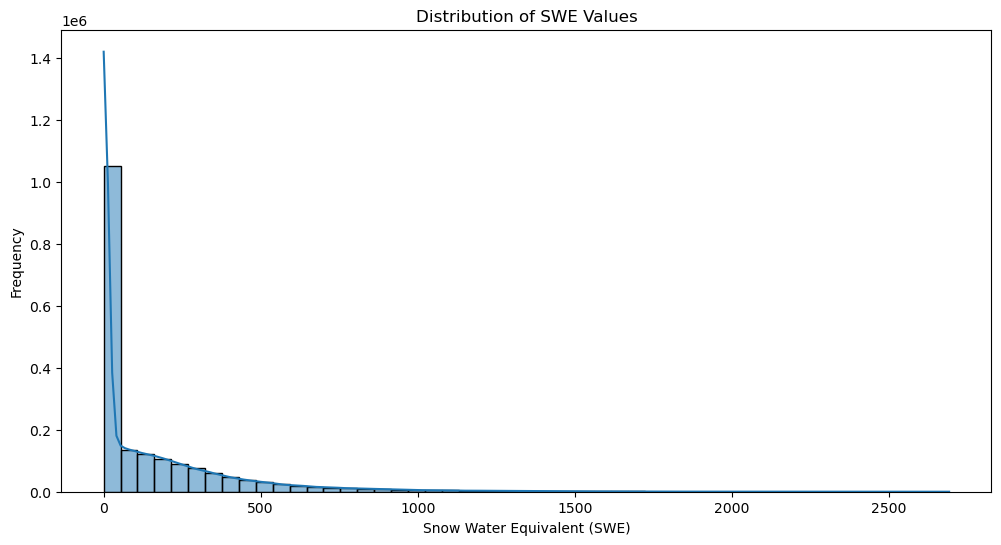

In [88]:
# SWE Data Visualization
plt.figure(figsize=(12, 6))
sns.histplot(swe_values["SWE"], bins=50, kde=True)
plt.title("Distribution of SWE Values")
plt.xlabel("Snow Water Equivalent (SWE)")
plt.ylabel("Frequency")
plt.show()

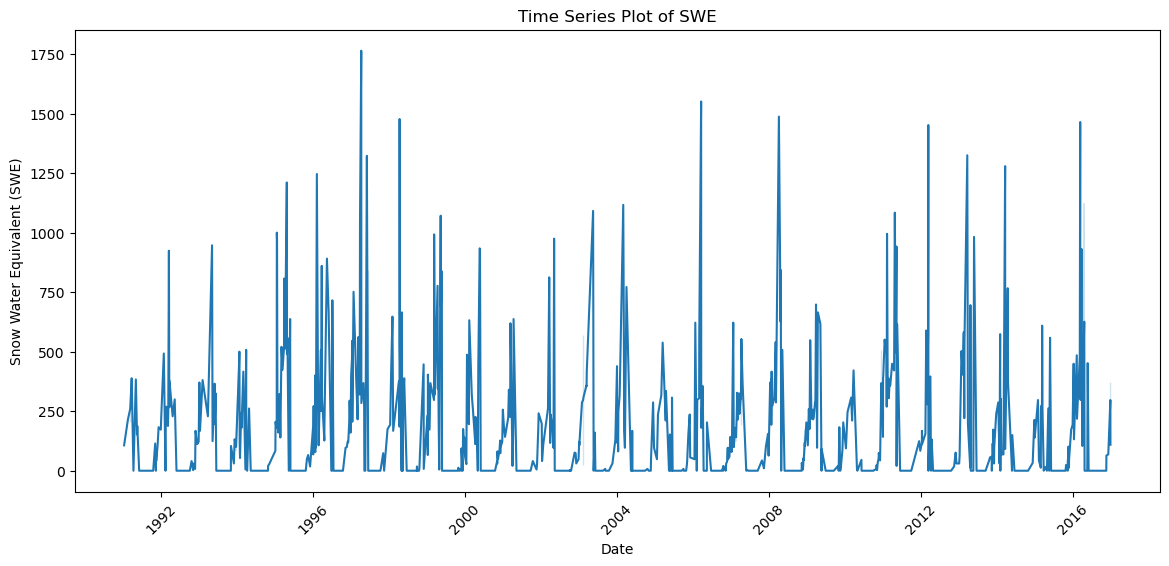

In [94]:
# Time Series Visualization of SWE
swe_values['Date'] = pd.to_datetime(swe_values['Date'])
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='SWE', data=swe_values.sample(1000))  # Sampled for performanc
plt.title("Time Series Plot of SWE")
plt.xlabel("Date")
plt.ylabel("Snow Water Equivalent (SWE)")
plt.xticks(rotation=45)
plt.show()

#### Meteorological Data

In [9]:
#parse meteorological_data
md_precip = pd.read_csv('./meteorological_data/Modified_Output_precip.csv')
md_Rmax = pd.read_csv('./meteorological_data/Modified_Output_Rmax.csv')
md_Rmin = pd.read_csv('./meteorological_data/Modified_Output_Rmin.csv')
md_SPH = pd.read_csv('./meteorological_data/Modified_Output_SPH.csv')
md_SRAD = pd.read_csv('./meteorological_data/Modified_Output_SRAD.csv')
md_tmax = pd.read_csv('./meteorological_data/Modified_Output_tmax.csv')
md_tmin = pd.read_csv('./meteorological_data/Modified_Output_tmin.csv')
md_windspeed = pd.read_csv('./meteorological_data/Modified_Output_windspeed.csv')

#### Additional Test Location Data

In [11]:
# parse addtional_test_locations
atl_static = pd.read_csv('./additional_test_locations/Test_InputData_staticVars_2017_2019.csv')
atl_dynamic = pd.read_csv('./additional_test_locations/Test_InputData_dynamicVars_2017_2019.csv')

### Cleaning the data

#### SWE Data

In [11]:
# merge station_info and swe_values
merged_swe = pd.merge(station_info, swe_values, on=['Latitude', 'Longitude'], how='left')

In [13]:
merged_swe

,Station,Latitude,Longitude,Elevation,Southness,Date,SWE
0,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-01,111.76
1,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-02,111.76
2,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-03,111.76
3,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-04,111.76
4,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-05,111.76
...,...,...,...,...,...,...,...
1899395,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-27,30.48
1899396,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-28,30.48
1899397,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-29,30.48
1899398,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-30,27.94


#### Meteorological Data

In [17]:
# rename individual meteorological data columns appropiately
md_precip = md_precip.rename(columns={'variable_value':'precip'})
md_Rmax = md_Rmax.rename(columns={'variable_value':'Rmax'})
md_Rmin = md_Rmin.rename(columns={'variable_value':'Rmin'})
md_SPH = md_SPH.rename(columns={'variable_value':'SPH'})
md_SRAD = md_SRAD.rename(columns={'variable_value':'SRAD'})
md_tmax = md_tmax.rename(columns={'variable_value':'tmax'})
md_tmin = md_tmin.rename(columns={'variable_value':'tmin'})
md_windspeed = md_windspeed.rename(columns={'variable_value':'windspeed'})

In [18]:
# merge all individual meteorological data into one dataframe
merged_md = pd.merge(md_precip, md_Rmax, on=['date', 'lat', 'lon'], how='inner')
merged_md = pd.merge(merged_md, md_Rmin, on=['date', 'lat', 'lon'], how='inner')
merged_md = pd.merge(merged_md, md_SPH, on=['date', 'lat', 'lon'], how='inner')
merged_md = pd.merge(merged_md, md_SRAD, on=['date', 'lat', 'lon'], how='inner')
merged_md = pd.merge(merged_md, md_tmax, on=['date', 'lat', 'lon'], how='inner')
merged_md = pd.merge(merged_md, md_tmin, on=['date', 'lat', 'lon'], how='inner')
merged_md = pd.merge(merged_md, md_windspeed, on=['date', 'lat', 'lon'], how='inner')

In [19]:
merged_md

,date,lat,lon,precip,Rmax,Rmin,SPH,SRAD,tmax,tmin,windspeed
0,1990-01-02,43.40625,-109.03125,0.000,83.81,33.77,0.0020,75.800,2.83,-10.28,3.83
1,1990-01-03,43.40625,-109.03125,0.000,79.54,29.78,0.0011,83.150,-2.86,-15.86,3.16
2,1990-01-05,43.40625,-109.03125,0.000,79.02,38.86,0.0015,82.175,0.79,-13.11,3.46
3,1990-01-07,43.40625,-109.03125,0.000,81.46,34.56,0.0025,79.125,6.31,-6.86,4.53
4,1990-01-09,43.40625,-109.03125,0.000,81.02,33.54,0.0028,79.200,8.69,-5.16,4.93
...,...,...,...,...,...,...,...,...,...,...,...
3631115,2019-12-19,48.78125,-121.71875,37.325,100.00,83.70,0.0045,37.450,3.61,-5.13,6.16
3631116,2019-12-25,48.78125,-121.71875,0.000,98.00,65.63,0.0027,58.500,-0.01,-7.33,2.47
3631117,2019-12-26,48.78125,-121.71875,3.200,97.80,71.07,0.0026,57.825,-1.33,-7.34,3.83
3631118,2019-12-27,48.78125,-121.71875,4.025,100.00,76.37,0.0035,40.125,1.30,-6.58,3.37


In [20]:
# rename Longitude and latitude column
merged_md = merged_md.rename(columns={'date':'Date', 'lat':'Latitude', 'lon':'Longitude'})
merged_md

,Date,Latitude,Longitude,precip,Rmax,Rmin,SPH,SRAD,tmax,tmin,windspeed
0,1990-01-02,43.40625,-109.03125,0.000,83.81,33.77,0.0020,75.800,2.83,-10.28,3.83
1,1990-01-03,43.40625,-109.03125,0.000,79.54,29.78,0.0011,83.150,-2.86,-15.86,3.16
2,1990-01-05,43.40625,-109.03125,0.000,79.02,38.86,0.0015,82.175,0.79,-13.11,3.46
3,1990-01-07,43.40625,-109.03125,0.000,81.46,34.56,0.0025,79.125,6.31,-6.86,4.53
4,1990-01-09,43.40625,-109.03125,0.000,81.02,33.54,0.0028,79.200,8.69,-5.16,4.93
...,...,...,...,...,...,...,...,...,...,...,...
3631115,2019-12-19,48.78125,-121.71875,37.325,100.00,83.70,0.0045,37.450,3.61,-5.13,6.16
3631116,2019-12-25,48.78125,-121.71875,0.000,98.00,65.63,0.0027,58.500,-0.01,-7.33,2.47
3631117,2019-12-26,48.78125,-121.71875,3.200,97.80,71.07,0.0026,57.825,-1.33,-7.34,3.83
3631118,2019-12-27,48.78125,-121.71875,4.025,100.00,76.37,0.0035,40.125,1.30,-6.58,3.37


#### Additional Test Location Data

In [22]:
# merge addtional_test_locations static and dynamic data
merged_atl = pd.merge(atl_static, atl_dynamic, on=['lat', 'lon'], how='left')

In [23]:
merged_atl

,lat,lon,Elevation,Southness,date,precip,Rmax,Rmin,SPH,SRAD,tmax,tmin,windspeed
0,45.21875,-119.21875,5770,-0.124565,2017-01-01,3.575,100.00,71.78,0.0024,54.700,-3.09,-9.90,4.56
1,45.21875,-119.21875,5770,-0.124565,2017-01-02,0.600,99.67,67.66,0.0020,28.300,-5.27,-11.50,1.96
2,45.21875,-119.21875,5770,-0.124565,2017-01-03,0.000,82.28,55.65,0.0013,50.275,-7.88,-13.37,3.40
3,45.21875,-119.21875,5770,-0.124565,2017-01-04,0.000,96.78,44.43,0.0010,72.725,-9.18,-19.19,5.92
4,45.21875,-119.21875,5770,-0.124565,2017-01-05,0.000,81.10,27.47,0.0008,84.150,-5.78,-18.93,3.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,39.28125,-117.09375,8685,-0.168625,2019-12-27,0.000,67.91,54.06,0.0016,104.400,-6.22,-10.46,2.61
10946,39.28125,-117.09375,8685,-0.168625,2019-12-28,0.000,66.72,48.63,0.0016,104.225,-5.12,-10.48,3.26
10947,39.28125,-117.09375,8685,-0.168625,2019-12-29,1.650,66.96,41.88,0.0021,87.675,0.73,-6.87,2.23
10948,39.28125,-117.09375,8685,-0.168625,2019-12-30,0.900,74.63,60.05,0.0026,53.175,-1.20,-5.47,1.89


#### Create the Final Data

To get the final data, we have to combine the swe data and the meteorological data. The latitudes and longitudes do not match directly, therefore we will use spatial coordinates and the nearest neigbors to determine data close to merge data close to the stations

In [26]:
from scipy.spatial import cKDTree

# extract spatial coordinates
swe_coords = merged_swe[['Latitude', 'Longitude']].values
md_coords = merged_md[['Latitude', 'Longitude']].drop_duplicates().values

# build KD-Tree using meteorological grid points
tree = cKDTree(md_coords)

# find the nearest meteorological grid point for each SWE station
distances, indices = tree.query(swe_coords, k=1)

# map each station to its closest meteorological grid point
merged_swe['nearest_md_latitude'] = md_coords[indices, 0]
merged_swe['nearest_md_longitude'] = md_coords[indices, 1]


In [27]:
merged_swe

,Station,Latitude,Longitude,Elevation,Southness,Date,SWE,nearest_md_latitude,nearest_md_longitude
0,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-01,111.76,45.21875,-119.21875
1,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-02,111.76,45.21875,-119.21875
2,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-03,111.76,45.21875,-119.21875
3,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-04,111.76,45.21875,-119.21875
4,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-05,111.76,45.21875,-119.21875
...,...,...,...,...,...,...,...,...,...
1899395,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-27,30.48,33.78125,-110.90625
1899396,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-28,30.48,33.78125,-110.90625
1899397,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-29,30.48,33.78125,-110.90625
1899398,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-30,27.94,33.78125,-110.90625


In [28]:
merged_md

,Date,Latitude,Longitude,precip,Rmax,Rmin,SPH,SRAD,tmax,tmin,windspeed
0,1990-01-02,43.40625,-109.03125,0.000,83.81,33.77,0.0020,75.800,2.83,-10.28,3.83
1,1990-01-03,43.40625,-109.03125,0.000,79.54,29.78,0.0011,83.150,-2.86,-15.86,3.16
2,1990-01-05,43.40625,-109.03125,0.000,79.02,38.86,0.0015,82.175,0.79,-13.11,3.46
3,1990-01-07,43.40625,-109.03125,0.000,81.46,34.56,0.0025,79.125,6.31,-6.86,4.53
4,1990-01-09,43.40625,-109.03125,0.000,81.02,33.54,0.0028,79.200,8.69,-5.16,4.93
...,...,...,...,...,...,...,...,...,...,...,...
3631115,2019-12-19,48.78125,-121.71875,37.325,100.00,83.70,0.0045,37.450,3.61,-5.13,6.16
3631116,2019-12-25,48.78125,-121.71875,0.000,98.00,65.63,0.0027,58.500,-0.01,-7.33,2.47
3631117,2019-12-26,48.78125,-121.71875,3.200,97.80,71.07,0.0026,57.825,-1.33,-7.34,3.83
3631118,2019-12-27,48.78125,-121.71875,4.025,100.00,76.37,0.0035,40.125,1.30,-6.58,3.37


In [29]:
# rename for clarity before merging
merged_md = merged_md.rename(columns={'Latitude': 'nearest_md_latitude', 'Longitude': 'nearest_md_longitude'})

# merge meteorological data with swe data using the nearest matched latitude and longitude
final_data = pd.merge(
    merged_swe, merged_md,
    on=['Date', 'nearest_md_latitude', 'nearest_md_longitude'],
    how='left'
)

In [30]:
final_data

,Station,Latitude,Longitude,Elevation,Southness,Date,SWE,nearest_md_latitude,nearest_md_longitude,precip,Rmax,Rmin,SPH,SRAD,tmax,tmin,windspeed
0,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-01,111.76,45.21875,-119.21875,0.00,92.91,64.75,0.0025,71.250,-0.86,-7.94,4.01
1,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-02,111.76,45.21875,-119.21875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-03,111.76,45.21875,-119.21875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-04,111.76,45.21875,-119.21875,0.00,99.88,62.76,0.0014,77.900,-6.28,-15.51,2.90
4,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-05,111.76,45.21875,-119.21875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899395,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-27,30.48,33.78125,-110.90625,0.00,50.49,17.52,0.0026,137.450,15.31,3.37,3.40
1899396,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-28,30.48,33.78125,-110.90625,0.00,45.33,16.91,0.0026,128.700,15.99,4.20,3.45
1899397,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-29,30.48,33.78125,-110.90625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899398,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-30,27.94,33.78125,-110.90625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# fill missing data
final_data.ffill(inplace=True) #using forward fill because it is a time series prediction

In [32]:
final_data

,Station,Latitude,Longitude,Elevation,Southness,Date,SWE,nearest_md_latitude,nearest_md_longitude,precip,Rmax,Rmin,SPH,SRAD,tmax,tmin,windspeed
0,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-01,111.76,45.21875,-119.21875,0.00,92.91,64.75,0.0025,71.250,-0.86,-7.94,4.01
1,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-02,111.76,45.21875,-119.21875,0.00,92.91,64.75,0.0025,71.250,-0.86,-7.94,4.01
2,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-03,111.76,45.21875,-119.21875,0.00,92.91,64.75,0.0025,71.250,-0.86,-7.94,4.01
3,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-04,111.76,45.21875,-119.21875,0.00,99.88,62.76,0.0014,77.900,-6.28,-15.51,2.90
4,Arbuckle Mtn,45.19085,-119.25392,5770,-0.124565,1991-01-05,111.76,45.21875,-119.21875,0.00,99.88,62.76,0.0014,77.900,-6.28,-15.51,2.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899395,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-27,30.48,33.78125,-110.90625,0.00,50.49,17.52,0.0026,137.450,15.31,3.37,3.40
1899396,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-28,30.48,33.78125,-110.90625,0.00,45.33,16.91,0.0026,128.700,15.99,4.20,3.45
1899397,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-29,30.48,33.78125,-110.90625,0.00,45.33,16.91,0.0026,128.700,15.99,4.20,3.45
1899398,Workman Creek,33.81259,-110.91852,7032,0.922266,2016-12-30,27.94,33.78125,-110.90625,0.00,45.33,16.91,0.0026,128.700,15.99,4.20,3.45


In [33]:
# Save cleaned data
final_data.to_csv("cleaned_data.csv", index=False)


### Time Series Feauture Engineering

In [59]:
import numpy as np

In [61]:
# Sort by location (latitude, longitude) and date to maintain time-series order
df = final_data.sort_values(by=['Latitude', 'Longitude', 'Date'])
df

,Station,Latitude,Longitude,Elevation,Southness,Date,SWE,nearest_md_latitude,nearest_md_longitude,precip,Rmax,Rmin,SPH,SRAD,tmax,tmin,windspeed
702778,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-01,251.46,33.65625,-109.28125,0.375,100.00,50.58,0.0017,58.425,-2.03,-15.02,3.63
702779,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-02,251.46,33.65625,-109.28125,0.375,100.00,50.58,0.0017,58.425,-2.03,-15.02,3.63
702780,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-03,251.46,33.65625,-109.28125,3.150,99.86,28.84,0.0040,102.150,8.22,-5.30,3.75
702781,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-04,251.46,33.65625,-109.28125,15.600,100.00,45.24,0.0043,93.900,6.35,-6.46,8.77
702782,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-05,274.32,33.65625,-109.28125,15.600,100.00,45.24,0.0043,93.900,6.35,-6.46,8.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626797,Garver Creek,48.97523,-115.81915,4250,-0.927766,2016-12-27,73.66,48.96875,-115.84375,0.000,76.28,55.28,0.0015,40.400,-4.07,-11.91,2.18
626798,Garver Creek,48.97523,-115.81915,4250,-0.927766,2016-12-28,81.28,48.96875,-115.84375,0.000,76.28,55.28,0.0015,40.400,-4.07,-11.91,2.18
626799,Garver Creek,48.97523,-115.81915,4250,-0.927766,2016-12-29,83.82,48.96875,-115.84375,3.700,86.82,56.46,0.0020,38.250,-0.59,-10.01,3.21
626800,Garver Creek,48.97523,-115.81915,4250,-0.927766,2016-12-30,83.82,48.96875,-115.84375,3.700,86.82,56.46,0.0020,38.250,-0.59,-10.01,3.21


#### Creating Lagged Features

Lagged features are essential in time-series modeling because they allow the model to capture past trends and dependencies, which improve predictions of future values. In this Snowpack Prediction Challenge, we use lagged features to better predict SWE (Snow Water Equivalent).

In [65]:
# List of dynamic variables to engineer features for
dynamic_features = ['SWE', 'precip', 'tmin', 'tmax', 'SPH', 'SRAD', 'Rmax', 'Rmin', 'windspeed']

# Create Lagged Features (Past 1, 3, and 7 Days)
lag_days = [1, 3, 7]
for feature in dynamic_features:
    for lag in lag_days:
        df[f"{feature}_lag{lag}"] = df.groupby(['Latitude', 'Longitude'])[feature].shift(lag)

In [71]:
df.columns

Index(['Station', 'Latitude', 'Longitude', 'Elevation', 'Southness', 'Date',
       'SWE', 'nearest_md_latitude', 'nearest_md_longitude', 'precip', 'Rmax',
       'Rmin', 'SPH', 'SRAD', 'tmax', 'tmin', 'windspeed', 'SWE_lag1',
       'SWE_lag3', 'SWE_lag7', 'precip_lag1', 'precip_lag3', 'precip_lag7',
       'tmin_lag1', 'tmin_lag3', 'tmin_lag7', 'tmax_lag1', 'tmax_lag3',
       'tmax_lag7', 'SPH_lag1', 'SPH_lag3', 'SPH_lag7', 'SRAD_lag1',
       'SRAD_lag3', 'SRAD_lag7', 'Rmax_lag1', 'Rmax_lag3', 'Rmax_lag7',
       'Rmin_lag1', 'Rmin_lag3', 'Rmin_lag7', 'windspeed_lag1',
       'windspeed_lag3', 'windspeed_lag7'],
      dtype='object')

#### Creating Rolling Averages

Rolling averages (also known as moving averages) smooth out fluctuations in time-series data, helping the model capture trends rather than short-term variations.

In [77]:
# Create Rolling Averages (3-day and 7-day windows)
rolling_windows = [3, 7]
for feature in dynamic_features:
    for window in rolling_windows:
        df[f"{feature}_roll{window}"] = df.groupby(['Latitude', 'Longitude'])[feature].rolling(window=window, min_periods=1).mean().reset_index(level=[0,1], drop=True)


In [81]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [83]:
df

,Station,Latitude,Longitude,Elevation,Southness,Date,SWE,nearest_md_latitude,nearest_md_longitude,precip,...,SPH_roll3,SPH_roll7,SRAD_roll3,SRAD_roll7,Rmax_roll3,Rmax_roll7,Rmin_roll3,Rmin_roll7,windspeed_roll3,windspeed_roll7
702785,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-08,279.40,33.65625,-109.28125,0.00,...,0.003267,0.003443,135.350000,107.775000,100.000000,99.980000,45.120000,43.608571,2.963333,4.830000
702786,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-09,279.40,33.65625,-109.28125,0.35,...,0.003000,0.003629,140.833333,118.657143,100.000000,99.980000,37.123333,40.572857,3.130000,4.901429
702787,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-10,281.94,33.65625,-109.28125,0.35,...,0.003000,0.003486,137.716667,123.292857,100.000000,100.000000,33.226667,40.642857,3.630000,4.955714
702788,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-11,281.94,33.65625,-109.28125,0.00,...,0.002733,0.003186,138.966667,130.978571,100.000000,100.000000,28.913333,38.191429,4.096667,4.278571
702789,Hannagan Meadows,33.65352,-109.30877,9027,0.888152,1991-01-12,281.94,33.65625,-109.28125,0.00,...,0.002333,0.002829,143.500000,138.735714,92.916667,96.964286,26.910000,35.060000,3.933333,3.545714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626797,Garver Creek,48.97523,-115.81915,4250,-0.927766,2016-12-27,73.66,48.96875,-115.84375,0.00,...,0.001500,0.000929,40.400000,43.157143,76.280000,80.628571,55.280000,45.525714,2.180000,2.528571
626798,Garver Creek,48.97523,-115.81915,4250,-0.927766,2016-12-28,81.28,48.96875,-115.84375,0.00,...,0.001500,0.001071,40.400000,42.467857,76.280000,79.541429,55.280000,47.964286,2.180000,2.441429
626799,Garver Creek,48.97523,-115.81915,4250,-0.927766,2016-12-29,83.82,48.96875,-115.84375,3.70,...,0.001667,0.001286,39.683333,41.471429,79.793333,79.960000,55.673333,50.571429,2.523333,2.501429
626800,Garver Creek,48.97523,-115.81915,4250,-0.927766,2016-12-30,83.82,48.96875,-115.84375,3.70,...,0.001833,0.001500,38.966667,40.475000,83.306667,80.378571,56.066667,53.178571,2.866667,2.561429


In [100]:
df.columns

Index(['Station', 'Latitude', 'Longitude', 'Elevation', 'Southness', 'Date',
       'SWE', 'nearest_md_latitude', 'nearest_md_longitude', 'precip', 'Rmax',
       'Rmin', 'SPH', 'SRAD', 'tmax', 'tmin', 'windspeed', 'SWE_lag1',
       'SWE_lag3', 'SWE_lag7', 'precip_lag1', 'precip_lag3', 'precip_lag7',
       'tmin_lag1', 'tmin_lag3', 'tmin_lag7', 'tmax_lag1', 'tmax_lag3',
       'tmax_lag7', 'SPH_lag1', 'SPH_lag3', 'SPH_lag7', 'SRAD_lag1',
       'SRAD_lag3', 'SRAD_lag7', 'Rmax_lag1', 'Rmax_lag3', 'Rmax_lag7',
       'Rmin_lag1', 'Rmin_lag3', 'Rmin_lag7', 'windspeed_lag1',
       'windspeed_lag3', 'windspeed_lag7', 'SWE_roll3', 'SWE_roll7',
       'precip_roll3', 'precip_roll7', 'tmin_roll3', 'tmin_roll7',
       'tmax_roll3', 'tmax_roll7', 'SPH_roll3', 'SPH_roll7', 'SRAD_roll3',
       'SRAD_roll7', 'Rmax_roll3', 'Rmax_roll7', 'Rmin_roll3', 'Rmin_roll7',
       'windspeed_roll3', 'windspeed_roll7'],
      dtype='object')

#### Adding more features

In [118]:
# covert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [108]:
df['temp_range'] = df['tmax'] - df['tmin']  # Daily temperature difference
df['snowfall'] = df['precip'] * (df['tmax'] < 0).astype(int)  # Assume snowfall if Tmax < 0°C
df['humidity_diff'] = df['Rmax'] - df['Rmin']  # Humidity difference
df['day_of_year'] = df['Date'].dt.dayofyear  # Extracts day of the year (1-365)

# Humidity and Wind Interaction
df['humidity_temp_interaction'] = df['humidity_diff'] * df['tmax']
df['wind_humidity_interaction'] = df['windspeed'] * df['humidity_diff']

In [114]:
# save feature engineered data
df.to_csv("feature_engineered_data.csv", index=False)

### Model Development
We will start with using baseline models like Linear Reagression and Random Forest, then extend it to advanced algorithms like LSTM and GRU. Finally, we will end with CNN-LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Placeholder: Load preprocessed dataset (to be replaced with actual data file)
# Assume the dataset is already cleaned and structured as described in Phase 2.5
data_path = "/mnt/data/preprocessed_swe_data.csv"  # Placeholder path
df = pd.read_csv(data_path)

# Extract features and target variable
features = ["latitude", "longitude", "precip", "tmin", "tmax", "SPH", "SRAD", "Rmax", "Rmin", "windspeed", "elevation", "southness"]
target = "SWE"

# Splitting data into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

X_train, y_train = train_df[features], train_df[target]
X_val, y_val = val_df[features], val_df[target]
X_test, y_test = test_df[features], test_df[target]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    model_results[name] = {"RMSE": rmse, "R2": r2}

# Display model results
import ace_tools as tools
model_results_df = pd.DataFrame(model_results).T
tools.display_dataframe_to_user(name="Model Selection Results", dataframe=model_results_df)


In [144]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
# Extract features and target variable
features = ["Latitude", "Longitude", "Elevation", "Southness",
    "precip", "tmin", "tmax", "SPH", "SRAD", "Rmax", "Rmin", "windspeed",
    "SWE_lag1", "SWE_lag3", "SWE_lag7",
    "precip_lag1", "tmin_lag1", "tmax_lag1", "SPH_lag1",
    "SRAD_lag1", "Rmax_lag1", "Rmin_lag1", "windspeed_lag1",
    "SWE_roll3", "SWE_roll7", "precip_roll3", "tmin_roll3"]
target = "SWE"

In [138]:
# Splitting data into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

X_train, y_train = train_df[features], train_df[target]
X_val, y_val = val_df[features], val_df[target]
X_test, y_test = test_df[features], test_df[target]

KeyError: "['latitude', 'longitude', 'elevation', 'southness'] not in index"

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Train and evaluate models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    model_results[name] = {"RMSE": rmse, "R2": r2}

# Display model results
import ace_tools as tools
model_results_df = pd.DataFrame(model_results).T
tools.display_dataframe_to_user(name="Model Selection Results", dataframe=model_results_df)

In [ ]:
# Perform Feature Importance Analysis using Random Forest
   
selected_features = [
    "Latitude", "Longitude", "Elevation", "Southness",
    "precip", "tmin", "tmax", "SPH", "SRAD", "Rmax", "Rmin", "windspeed",
    "SWE_lag1", "SWE_lag3", "SWE_lag7",
    "precip_lag1", "tmin_lag1", "tmax_lag1", "SPH_lag1",
    "SRAD_lag1", "Rmax_lag1", "Rmin_lag1", "windspeed_lag1",
    "SWE_roll3", "SWE_roll7", "precip_roll3", "tmin_roll3"
]

target = "SWE"

# Drop rows with missing values to ensure clean training data
df = df.dropna(subset=selected_features + [target])

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df[selected_features], df[target], test_size=0.2, random_state=42)

# Train a Random Forest model for feature importance ranking
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.DataFrame({
    "Feature": selected_features,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display feature importance results
import ace_tools as tools
tools.display_dataframe_to_user(name="Feature Importance Rankings", dataframe=feature_importances)

In [1]:
merged_atl

NameError: name 'merged_atl' is not defined

In [15]:
merged_swe.to_csv("merged_swe.csv", index=False)

In [16]:
pwd

'C:\\Users\\Raphael\\Documents\\Projects\\SnowPackPrediction\\data'